# ANOVA Assumptions - R

## Shapiro-Wilk Test (on responses)

* **Assumption:** Normality
* **Context of Use:** t-test, ANOVA, LM, LMM
* **Reporting:** "To test the assumption of conditional normality, a Shapiro-Wilk test was run on the response Y for each combination of levels of factors X1 and X2. All combinations were found to be statistically non-significant except condition (b,b), which showed a statistically significant deviation from normality (W = .794, p < .01)."

In [1]:
# Example data
# df has two factors (X1,X2) each w/two levels (a,b) and continuous response Y
df <- read.csv("data/2F2LBs_normal.csv")
head(df, 20)

,S,X1,X2,Y
,<int>,<chr>,<chr>,<dbl>
1,1,a,a,11.867340
2,2,a,b,15.453745
3,3,b,a,15.782415
4,4,b,b,13.626554
5,5,a,a,11.608195
6,6,a,b,19.540674
7,7,b,a,15.878829
8,8,b,b,16.654611
9,9,a,a,17.370245


In [2]:
## Shapiro-Wilk conditional normality test
# (on the response within each condition)
shapiro.test(df[df$X1 == "a" & df$X2 == "a",]$Y) # condition a,a
shapiro.test(df[df$X1 == "a" & df$X2 == "b",]$Y) # condition a,b
shapiro.test(df[df$X1 == "b" & df$X2 == "a",]$Y) # condition b,a
shapiro.test(df[df$X1 == "b" & df$X2 == "b",]$Y) # condition b,b


	Shapiro-Wilk normality test

data:  df[df$X1 == "a" & df$X2 == "a", ]$Y
W = 0.97554, p-value = 0.93



	Shapiro-Wilk normality test

data:  df[df$X1 == "a" & df$X2 == "b", ]$Y
W = 0.93417, p-value = 0.3147



	Shapiro-Wilk normality test

data:  df[df$X1 == "b" & df$X2 == "a", ]$Y
W = 0.98454, p-value = 0.9914



	Shapiro-Wilk normality test

data:  df[df$X1 == "b" & df$X2 == "b", ]$Y
W = 0.7938, p-value = 0.003064


## Shapiro-Wilk Test (on residuals)

* **Assumption:** Normality
* **Context of Use:** t-test, ANOVA, LM, LMM
* **Reporting:** "To test the normality assumption, a Shapiro-Wilk test was run on the residuals of a between-subjects full-factorial ANOVA model. The test was statistically non-significant (W = .988, p = .798), indicating compliance with the normality assumption. A Q-Q plot of residuals visually confirms the same (Figure 1)."

In [3]:
# Example data
# df has two factors (X1,X2) each w/two levels (a,b) and continuous response Y
df <- read.csv("data/2F2LBs_normal.csv")
head(df, 20)

,S,X1,X2,Y
,<int>,<chr>,<chr>,<dbl>
1,1,a,a,11.867340
2,2,a,b,15.453745
3,3,b,a,15.782415
4,4,b,b,13.626554
5,5,a,a,11.608195
6,6,a,b,19.540674
7,7,b,a,15.878829
8,8,b,b,16.654611
9,9,a,a,17.370245


In [4]:
m = aov(Y ~ X1*X2, data=df) # make anova model
shapiro.test(residuals(m))


	Shapiro-Wilk normality test

data:  residuals(m)
W = 0.98751, p-value = 0.7979


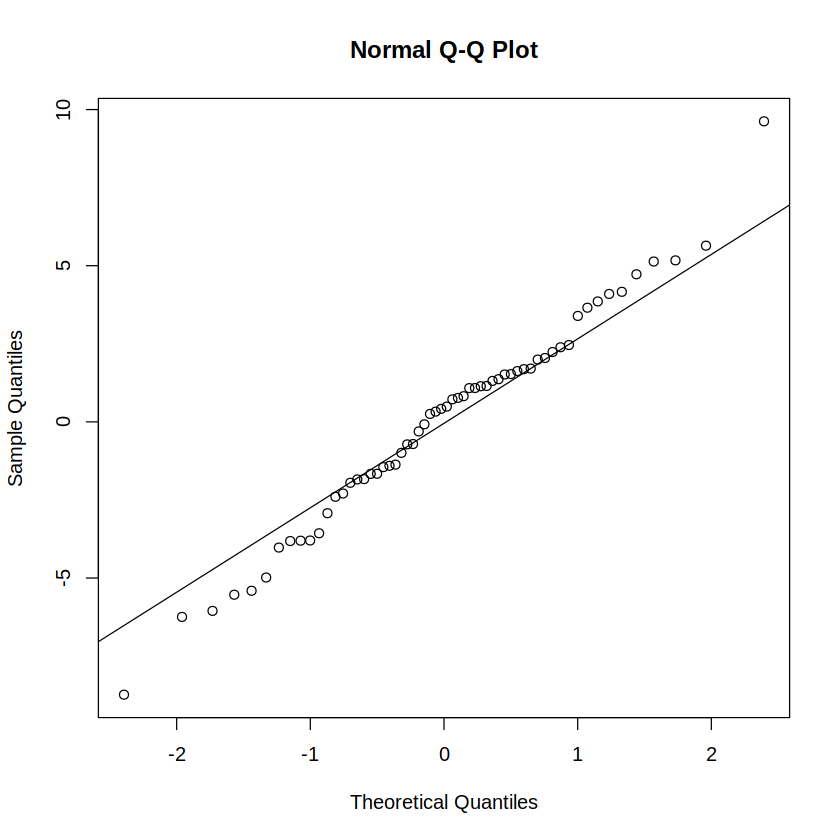

In [5]:
par(mfrow=c(1,1))
qqnorm(residuals(m)); qqline(residuals(m)) # Q-Q plot

## Anderson-Darling Test (on responses)

* **Assumption:** Normality
* **Context of Use:** t-test, ANOVA, LM, LMM
* **Reporting:** "To test the assumption of conditional normality, an Anderson-Darling test was run on the response Y for each combination of levels of factors X1 and X2. All combinations were found to be statistically non-significant except condition (b,b), which showed a statistically significant deviation from normality (A = 1.417, p < .001)."

In [6]:
# Example data
# df has two factors (X1,X2) each w/two levels (a,b) and continuous response Y
df <- read.csv("data/2F2LBs_normal.csv")
head(df, 20)

,S,X1,X2,Y
,<int>,<chr>,<chr>,<dbl>
1,1,a,a,11.867340
2,2,a,b,15.453745
3,3,b,a,15.782415
4,4,b,b,13.626554
5,5,a,a,11.608195
6,6,a,b,19.540674
7,7,b,a,15.878829
8,8,b,b,16.654611
9,9,a,a,17.370245


In [9]:
library(nortest)
ad.test(df[df$X1 == "a" & df$X2 == "a",]$Y) # condition a,a
ad.test(df[df$X1 == "a" & df$X2 == "b",]$Y) # condition a,b
ad.test(df[df$X1 == "b" & df$X2 == "a",]$Y) # condition b,a
ad.test(df[df$X1 == "b" & df$X2 == "b",]$Y) # condition b,b


	Anderson-Darling normality test

data:  df[df$X1 == "a" & df$X2 == "a", ]$Y
A = 0.23266, p-value = 0.7557



	Anderson-Darling normality test

data:  df[df$X1 == "a" & df$X2 == "b", ]$Y
A = 0.35901, p-value = 0.4023



	Anderson-Darling normality test

data:  df[df$X1 == "b" & df$X2 == "a", ]$Y
A = 0.16003, p-value = 0.934



	Anderson-Darling normality test

data:  df[df$X1 == "b" & df$X2 == "b", ]$Y
A = 1.4167, p-value = 0.0007191


## Anderson-Darling Test (on residuals)

* **Assumption:** Normality
* **Context of Use:** t-test, ANOVA, LM, LMM
* **Reporting:** "To test the normality assumption, an Anderson-Darling test was run on the residuals of a between-subjects full-factorial ANOVA model. The test was statistically non-significant (A = 0.329, p = .510), indicating compliance with the normality assumption. A Q-Q plot of residuals visually confirms the same (Figure 1)."

In [10]:
# Example data
# df has two factors (X1,X2) each w/two levels (a,b) and continuous response Y
df <- read.csv("data/2F2LBs_normal.csv")
head(df, 20)

,S,X1,X2,Y
,<int>,<chr>,<chr>,<dbl>
1,1,a,a,11.867340
2,2,a,b,15.453745
3,3,b,a,15.782415
4,4,b,b,13.626554
5,5,a,a,11.608195
6,6,a,b,19.540674
7,7,b,a,15.878829
8,8,b,b,16.654611
9,9,a,a,17.370245


In [11]:
library(nortest)
m = aov(Y ~ X1*X2, data=df) # make anova model
ad.test(residuals(m))


	Anderson-Darling normality test

data:  residuals(m)
A = 0.32859, p-value = 0.5102


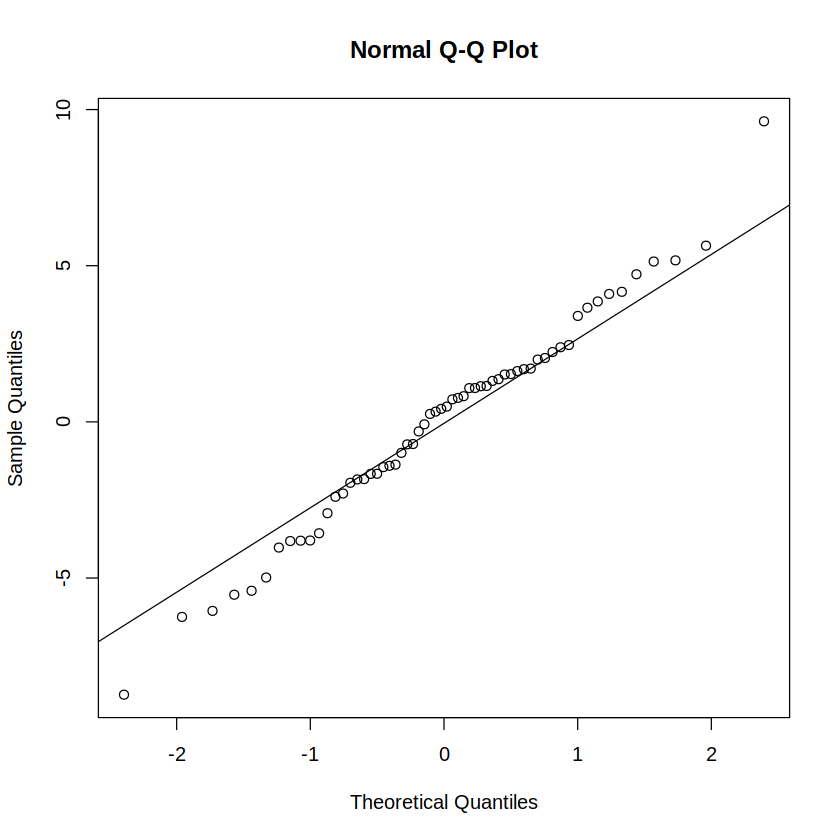

In [12]:
par(mfrow=c(1,1))
qqnorm(residuals(m)); qqline(residuals(m)) # Q-Q plot

## Levene's Test

* **Assumption:** Homoscedasticity (Homogeneity of Variance)
* **Context of Use:** t-test, ANOVA, LM, LMM
* **Reporting:** "To test the homoscedasticity assumption, Levene’s test was run on a between-subjects full-factorial ANOVA model. The test was statistically significant (F(3, 56) = 3.97, p < .05), indicating a departure from homoscedasticity."

In [13]:
# Example data
# df has two factors (X1,X2) each w/two levels (a,b) and continuous response Y
df <- read.csv("data/2F2LBs_normal.csv")
head(df, 20)

,S,X1,X2,Y
,<int>,<chr>,<chr>,<dbl>
1,1,a,a,11.867340
2,2,a,b,15.453745
3,3,b,a,15.782415
4,4,b,b,13.626554
5,5,a,a,11.608195
6,6,a,b,19.540674
7,7,b,a,15.878829
8,8,b,b,16.654611
9,9,a,a,17.370245


In [14]:
library(car) # for leveneTest and Anova
leveneTest(Y ~ X1*X2, data=df, center=mean)
# if a violation occurs and only a t-test is needed, use a Welch t-test
t.test(Y ~ X1, data=df, var.equal=FALSE) # Welch t-test
# if a violation occurs and an ANOVA is needed, use a White-adjusted ANOVA
m = aov(Y ~ X1*X2, data=df)
Anova(m, type=3, white.adjust=TRUE)

Loading required package: carData



,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,3.965124,0.01238959
,56,NA,NA



	Welch Two Sample t-test

data:  Y by X1
t = 0.80702, df = 43.125, p-value = 0.4241
alternative hypothesis: true difference in means between group a and group b is not equal to 0
95 percent confidence interval:
 -1.188936  2.775540
sample estimates:
mean in group a mean in group b 
       15.56348        14.77018 


Coefficient covariances computed by hccm()



,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>
(Intercept),1,103.0349856,2.652463e-14
X1,1,0.4129862,5.230802e-01
X2,1,8.0591851,6.296776e-03
X1:X2,1,3.6441353,6.139637e-02
Residuals,56,NA,NA


## Brown-Forsythe Test

* **Assumption:** Homoscedasticity (Homogeneity of Variance)
* **Context of Use:** t-test, ANOVA, LM, LMM
* **Reporting:** "To test the homoscedasticity assumption, the Brown-Forsythe test was run on a between-subjects full-factorial ANOVA model. The test was statistically significant (F(3, 56) = 3.75, p < .05), indicating a departure from homoscedasticity."

In [15]:
# Example data
# df has two factors (X1,X2) each w/two levels (a,b) and continuous response Y
df <- read.csv("data/2F2LBs_normal.csv")
head(df, 20)

,S,X1,X2,Y
,<int>,<chr>,<chr>,<dbl>
1,1,a,a,11.867340
2,2,a,b,15.453745
3,3,b,a,15.782415
4,4,b,b,13.626554
5,5,a,a,11.608195
6,6,a,b,19.540674
7,7,b,a,15.878829
8,8,b,b,16.654611
9,9,a,a,17.370245


In [16]:
library(car) # for leveneTest, Anova
leveneTest(Y ~ X1*X2, data=df, center=median)
# if a violation occurs and only a t-test is needed, use a Welch t-test
t.test(Y ~ X1, data=df, var.equal=FALSE) # Welch t-test
# if a violation occurs and an ANOVA is needed, use a White-adjusted ANOVA
m = aov(Y ~ X1*X2, data=df)
Anova(m, type=3, white.adjust=TRUE)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,3.750252,0.01587369
,56,NA,NA



	Welch Two Sample t-test

data:  Y by X1
t = 0.80702, df = 43.125, p-value = 0.4241
alternative hypothesis: true difference in means between group a and group b is not equal to 0
95 percent confidence interval:
 -1.188936  2.775540
sample estimates:
mean in group a mean in group b 
       15.56348        14.77018 


Coefficient covariances computed by hccm()



,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>
(Intercept),1,103.0349856,2.652463e-14
X1,1,0.4129862,5.230802e-01
X2,1,8.0591851,6.296776e-03
X1:X2,1,3.6441353,6.139637e-02
Residuals,56,NA,NA


## Mauchly's Test of Sphericity

* **Assumption:** Sphericity
* **Context of Use:** repeated measures ANOVA
* **Reporting:** "To test the sphericity assumption for repeated measures ANOVA, Mauchly’s test of sphericity was run on a mixed factorial ANOVA model with a between-subjects factor X1 and a within-subjects factor X2. The test was statistically significant for both X2 (W = .637, p < .01) and X1×X2 (W = .637, p < .01), indicating sphericity violations. Accordingly, the Greenhouse-Geisser correction was used when reporting these ANOVA results."

In [17]:
# Example data
# df has subjects (S), one between-Ss factor (X1), and one within-Ss factor (X2)
df <- read.csv("data/2F23LMs_mauchly.csv")
head(df, 20)

,S,X1,X2,Y
,<int>,<chr>,<chr>,<dbl>
1,1,a,a,20.2145
2,1,a,b,23.7485
3,1,a,c,20.7960
4,2,a,a,20.8805
5,2,a,b,23.2595
6,2,a,c,19.1305
7,3,a,a,21.2635
8,3,a,b,23.4945
9,3,a,c,20.8545


In [21]:
library(ez) # for ezANOVA
df <- read.csv("data/2F23LMs_mauchly.csv")
df$S = factor(df$S) # Subject id is nominal
m = ezANOVA(dv=Y, between=c(X1), within=c(X2), wid=S, type=3, data=df) # use c() for >1 factors
m$Mauchly # p<.05 indicates a sphericity violation for within-Ss effects

Warning message:
“Converting "X2" to factor for ANOVA.”
Warning message:
“Converting "X1" to factor for ANOVA.”


,Effect,W,p,p<.05
,<chr>,<dbl>,<dbl>,<chr>
3,X2,0.6370236,0.008782794,*
4,X1:X2,0.6370236,0.008782794,*
